In [1]:
import os
import json

import glob
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.environ['SIERRA_RESULTS_PATH']

'C:\\Users\\david\\Box\\CERC-WET\\Task7_San_Joaquin_Model\\pywr_models\\results'

In [4]:
with open('../pywr-models/utilities/basin_lookup.json') as f:
    basin_lookup = json.load(f)
class Basin(object):
    def __init__(self, basin_abbr):
        self.name = basin_lookup[basin_abbr]['name']
        self.full_name = basin_lookup[basin_abbr]['full name']

In [5]:
def load_variable(basin_name, variable):
    root_dir = os.environ['SIERRA_RESULTS_PATH']
    path = os.path.join(root_dir, 'Whiplash', basin_name, 'sequences')
    
    dfs = []
    for sequence in tqdm(os.listdir(path)):
        filepath = os.path.join(path, sequence, variable + '.csv')
        df = pd.read_csv(filepath, index_col=0, header=0, parse_dates=True)
        df = df.resample('M').agg('sum')
        df['sequence'] = sequence
        df = df.reset_index().set_index(['sequence', 'Date'])
        dfs.append(df)
    df = pd.concat(dfs, axis=0)
    return df

In [6]:
basin_abbr = 'stn'
basin = Basin(basin_abbr)

df = load_variable(basin.name, 'Hydropower_Energy_MWh')

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 31.59it/s]


In [7]:
df.head()

New Spicer Meadow PH   Donnells PH  \
sequence           Date                                             
S0001_Y06_D2W1_N01 2000-10-31            162.519887   4083.698127   
                   2000-11-30             74.506392   5877.540469   
                   2000-12-31             33.658167  20452.123571   
                   2001-01-31            990.916213  41548.091737   
                   2001-02-28              0.000000  22115.982035   

                               Collierville PH  Murphys PH  New Melones PH  \
sequence           Date                                                      
S0001_Y06_D2W1_N01 2000-10-31      1990.303273  814.539384    24764.695705   
                   2000-11-30     13831.555453  458.949911     5259.472487   
                   2000-12-31     27621.814924  814.539384     5484.673362   
                   2001-01-31     46806.950898  814.539384     8269.889673   
                   2001-02-28     19072.863996  735.712992     8433.024891   

                                Phoenix PH  Sand Bar PH  Stanislaus PH  \
sequence           Date                                                  
S0001_Y06_D2W1_N01 2000-10-31     0.000000   837.214839   17908.790631   
                   2000-11-30     0.000000  1137.962509   13931.106158   
                   2000-12-31   579.235063   489.446494   17741.669519   
                   2001-01-31  1683.401902  8256.085474   43000.653370   
                   2001-02-28  1520.492041  7483.253694   41358.897216   

                               Spring Gap PH  Beardsley PH   Angels PH  
sequence           Date                                                 
S0001_Y06_D2W1_N01 2000-10-31    5347.199509           0.0  403.157034  
                   2000-11-30    4229.148702           0.0  263.352674  
                   2000-12-31    4476.658697           0.0  470.027040  
                   2001-01-31    5498.890222           0.0  537.587498  
                   2001-02-28    3510.268643           0.0  399.146224

In [13]:
dfm = df.reset_index()
dfm['wy'] = dfm['Date'].map(lambda d: d.year if d.month < 10 else d.year + 1)
dfm.set_index('sequence', 'wy')
dfm.head()

,sequence,Date,New Spicer Meadow PH,Donnells PH,Collierville PH,Murphys PH,New Melones PH,Phoenix PH,Sand Bar PH,Stanislaus PH,Spring Gap PH,Beardsley PH,Angels PH,wy
0,S0001_Y06_D2W1_N01,2000-10-31,162.519887,4083.698127,1990.303273,814.539384,24764.695705,0.000000,837.214839,17908.790631,5347.199509,0.0,403.157034,2001
1,S0001_Y06_D2W1_N01,2000-11-30,74.506392,5877.540469,13831.555453,458.949911,5259.472487,0.000000,1137.962509,13931.106158,4229.148702,0.0,263.352674,2001
2,S0001_Y06_D2W1_N01,2000-12-31,33.658167,20452.123571,27621.814924,814.539384,5484.673362,579.235063,489.446494,17741.669519,4476.658697,0.0,470.027040,2001
3,S0001_Y06_D2W1_N01,2001-01-31,990.916213,41548.091737,46806.950898,814.539384,8269.889673,1683.401902,8256.085474,43000.653370,5498.890222,0.0,537.587498,2001
4,S0001_Y06_D2W1_N01,2001-02-28,0.000000,22115.982035,19072.863996,735.712992,8433.024891,1520.492041,7483.253694,41358.897216,3510.268643,0.0,399.146224,2001


In [80]:
df2 = df.sum(axis=1).to_frame()
df2['dry'] = df.index.get_level_values(0).map(lambda x: int(x.split('_')[2].split('W')[0][1:]))
df2['wet'] = df.index.get_level_values(0).map(lambda x: int(x.split('_')[2].split('W')[1]))
df2['n'] = df.index.get_level_values(0).map(lambda x: int(x.split('_')[3][1:]))
df2.reset_index(inplace=True)
del df2['sequence']
df2.set_index(['dry', 'wet', 'n', 'Date'], inplace=True)
df2.columns = ['MWh']
df2.head()

MWh
dry wet n Date                     
2   1   1 2000-10-31   56312.118389
          2000-11-30   45063.594756
          2000-12-31   78163.846221
          2001-01-31  157407.006372
          2001-02-28  104629.641732

In [81]:
df3 = df2.reset_index()
wet1 = df3[df3['wet']==1]

In [82]:
dry_years = list(set(df3['dry']))
dry_years

[2, 3, 4, 5]

2
3
4
5


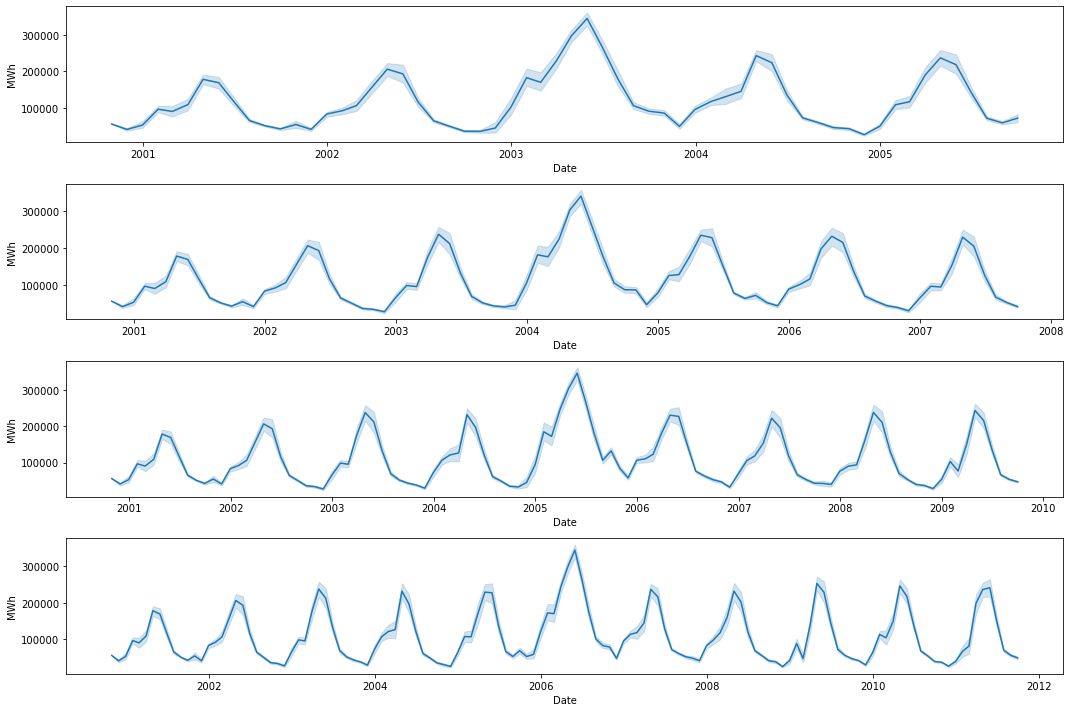

In [85]:
D = len(dry_years)
fig, axes = plt.subplots(D, 1, figsize=(15,10))
for i, d in enumerate(dry_years):
    print(d)
    ax = axes[i]
    data = wet1[wet1['dry']==d]
    sns.lineplot(data=data, x='Date', y='MWh', ax=ax)
fig.tight_layout()